<a href="https://colab.research.google.com/github/daveyeajoon/sales-prediction/blob/main/Yeajoon_Sales_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import 
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, \
OrdinalEncoder
from sklearn import set_config
from sklearn.compose import make_column_selector, make_column_transformer
set_config(display='diagram')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sales_predictions.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sales_predictions.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df['Item_Weight'].isna()==True]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [ ]:
df[df['Item_Identifier']=='FDP10']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [ ]:
df.set_index('Item_Identifier')['Item_Outlet_Sales']
df.groupby('Item_Identifier')['Item_Outlet_Sales'].median()

Item_Identifier
DRA12    1772.6925
DRA24    1146.5076
DRA59    1850.9240
DRB01    1518.0240
DRB13    3415.5540
           ...    
NCZ30    2410.1960
NCZ41    1877.5560
NCZ42    4266.4464
NCZ53    3203.1638
NCZ54    2599.2832
Name: Item_Outlet_Sales, Length: 1559, dtype: float64

In [ ]:
df['Item_Fat_Content'].replace({
    'LF':'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
}, inplace=True)
df['Item_Fat_Content'].value_counts()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.groupby('Item_Type').describe()

Item_Weight                                        \
                            count       mean       std    min       25%   
Item_Type                                                                 
Baking Goods                536.0  12.277108  4.773622  4.880   8.23500   
Breads                      204.0  11.346936  4.440540  4.635   7.12875   
Breakfast                    89.0  12.768202  5.038131  6.425   8.06000   
Canned                      539.0  12.305705  4.586564  4.615   8.11500   
Dairy                       566.0  13.426069  4.686532  4.805   9.27750   
Frozen Foods                718.0  12.867061  4.507383  4.555   8.93500   
Fruits and Vegetables      1019.0  13.224769  4.575275  5.460   9.19500   
Hard Drinks                 183.0  11.400328  4.239144  4.610   8.26000   
Health and Hygiene          430.0  13.142314  4.512313  5.175   9.69500   
Household                   759.0  13.384736  4.998845  5.030   8.69500   
Meat                        337.0  12.817344  4.670812  5.150   9.30000   
Others                      137.0  13.853285  4.225534  5.500  10.65000   
Seafood                      51.0  12.552843  5.473830  5.365   7.42000   
Snack Foods                 988.0  12.987880  4.531256  5.095   9.19500   
Soft Drinks                 374.0  11.847460  4.403699  4.590   8.26000   
Starchy Foods               130.0  13.690731  4.010061  6.695  11.50000   

                                            Item_Visibility            ...  \
                          50%    75%    max           count      mean  ...   
Item_Type                                                              ...   
Baking Goods           11.650  15.75  20.85           648.0  0.069169  ...   
Breads                 10.600  14.85  20.85           251.0  0.066255  ...   
Breakfast              10.695  17.25  21.10           110.0  0.085723  ...   
Canned                 12.150  16.25  21.35           649.0  0.068129  ...   
Dairy                  13.350  17.60  20.70           682.0  0.072427  ...   
Frozen Foods           12.850  17.00  20.85           856.0  0.065645  ...   
Fruits and Vegetables  13.100  17.10  21.35          1232.0  0.068513  ...   
Hard Drinks            10.100  14.85  19.70           214.0  0.064943  ...   
Health and Hygiene     12.150  17.60  21.25           520.0  0.055216  ...   
Household              13.150  18.35  21.25           910.0  0.061322  ...   
Meat                   12.350  17.20  21.25           425.0  0.062284  ...   
Others                 14.500  17.75  20.50           169.0  0.060241  ...   
Seafood                11.650  17.75  20.75            64.0  0.074976  ...   
Snack Foods            13.150  16.85  21.25          1200.0  0.066850  ...   
Soft Drinks            11.800  15.35  20.75           445.0  0.063972  ...   
Starchy Foods          13.175  16.70  21.20           148.0  0.067564  ...   

                      Outlet_Establishment_Year         Item_Outlet_Sales  \
                                            75%     max             count   
Item_Type                                                                   
Baking Goods                             2004.0  2009.0             648.0   
Breads                                   2004.0  2009.0             251.0   
Breakfast                                2004.0  2009.0             110.0   
Canned                                   2004.0  2009.0             649.0   
Dairy                                    2004.0  2009.0             682.0   
Frozen Foods                             2004.0  2009.0             856.0   
Fruits and Vegetables                    2004.0  2009.0            1232.0   
Hard Drinks                              2004.0  2009.0             214.0   
Health and Hygiene                       2004.0  2009.0             520.0   
Household                                2004.0  2009.0             910.0   
Meat                                     2004.0  2009.0             425.0   
Others                             

In [ ]:
df['Item_Identifier'].value_counts()
df['Item_Outlet_Sales'].value_counts()
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Type'].value_counts()
df['Item_Identifier'].value_counts()
df['Outlet_Identifier'].value_counts()
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'], ['Regular'])
print(df['Item_Fat_Content'])

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object


In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.dropna(inplace = True)

# **Heatmap of the correlation**



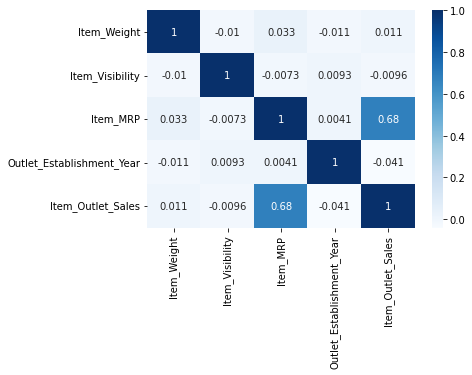

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)

# **Price and Outlet Sales**




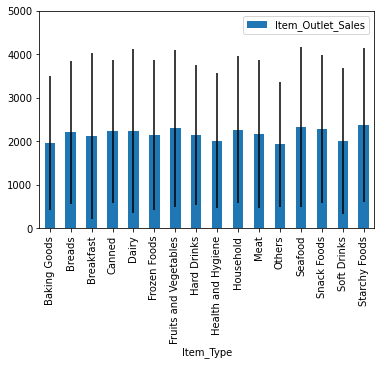

In [ ]:
stdoutlet_sales = df.groupby('Item_Type').std()['Item_Outlet_Sales']
df.groupby('Item_Type').mean().plot(y = 'Item_Outlet_Sales', kind = 'bar', ylim = (0, 5000), yerr = stdoutlet_sales)

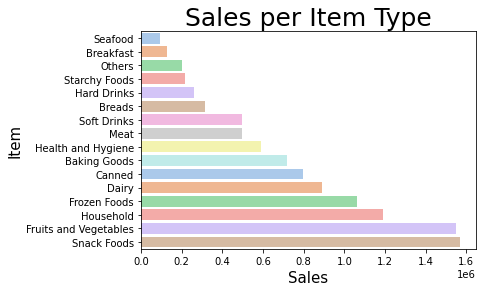

In [ ]:
total_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values()
sns.barplot(data=df, x=total_sales.values, y=total_sales.index, palette = "pastel")
plt.title('Sales per Item Type', fontsize = 25)
plt.xlabel('Sales', fontsize = 15)
plt.ylabel('Item', fontsize = 15);

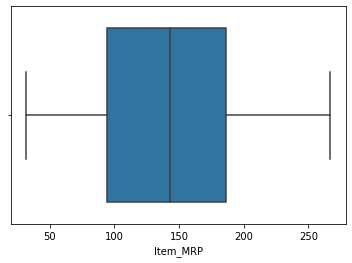

In [ ]:
sns.boxplot(x='Item_MRP',  data=df)

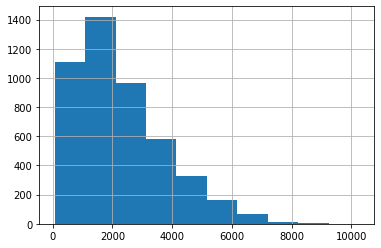

In [ ]:
df['Item_Outlet_Sales'].hist()

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    3004
Regular    1646
Name: Item_Fat_Content, dtype: int64

# **Linear Regression**

In [ ]:
def evaluate_model(y_true, y_pred, split='training'):
  """ prints RMSE, and R2 metrics, include which data split was evaluated
  
  Args:
    y_true: y-train or y-test
    y_pred: result of model.predict(X)
    split: which data split is being evaluate ['training','test']
  """
  
  r2 = r2_score(y_true,y_pred)
  rmse = mean_squared_error(y_true,y_pred,squared=False)

  print(f'Results for {split} data:')
  print(f"  - R^2 = {round(r2,3)}")
  print(f"  - RMSE = {round(rmse,3)}")
  print()


In [ ]:
y = df['Item_Outlet_Sales']
X = df.drop(columns = bad_cols)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
reg = LinearRegression()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
num_pipe = make_pipeline(mean_imputer, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
cat_pipe = make_pipeline(freq_imputer, ohe)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [ ]:
preprocessor = make_column_transformer(num_tuple, cat_tuple)

preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe10d5b3f90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe10d5b3a50>)])

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe10d5b3f90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe10d5b3a50>)])

In [ ]:
preprocessor.transform(X_train)

array([[-1.61873556, -0.80142192,  1.55615978, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.6567808 ,  1.06509895,  0.31746464, ...,  0.        ,
         1.        ,  0.        ],
       [-0.49444827,  1.49877652, -0.31978717, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.28752511,  0.43911456, -0.98967997, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.21264393, -0.69794226,  1.19135799, ...,  0.        ,
         1.        ,  0.        ],
       [-0.08688075, -0.28145496, -1.30541276, ...,  1.        ,
         1.        ,  0.        ]])

In [ ]:
reg_pipe = make_pipeline(preprocessor, reg)

reg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe10d5b3f90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe10d5b3a50>)])),
                ('linearregression', LinearRegression())])

In [ ]:
reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe10d5b3f90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe10d5b3a50>)])),
                ('linearregression', LinearRegression())])

In [ ]:
train_pred = reg_pipe.predict(X_train)
test_pred = reg_pipe.predict(X_test)

In [ ]:
#MAE
train_MAE = mean_absolute_error(y_train, train_pred)
test_MAE = mean_absolute_error(y_test, test_pred)
print(f'Model Training MAE: {train_MAE}')
print(f'Model Testing MAE: {test_MAE}')

Model Training MAE: 1.8505980611802433e-12
Model Testing MAE: 1.8944303468060947e-12


In [ ]:
#R2
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
print(f'Model Training for R2": {train_r2}')
print(f'Model Testing for R2": {test_r2}')

Model Training for R2": 1.0
Model Testing for R2": 1.0


In [ ]:
#MSE
train_MSE = mean_squared_error(y_train, train_pred)
test_MSE = mean_squared_error(y_test, test_pred)
print(f'Model Training for MSE": {train_MSE}')
print(f'Model Testing for MSE": {test_MSE}')

Model Training for MSE": 5.168725284416673e-24
Model Testing for MSE": 5.375588009761558e-24


In [ ]:
#RMSE
train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')

Model Training RMSE: 2.273483073263725e-12
Model Testing RMSE: 2.318531433852377e-12


# **Decision Tree Model**

In [ ]:
dec_tree = DecisionTreeRegressor(random_state=42)

In [ ]:
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

dec_tree_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe10d5b3f90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe10d5b3a50>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe10d5b3f90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe10d5b3a50>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
train_dec_pred = dec_tree_pipe.predict(X_train)
test_dec_pred = dec_tree_pipe.predict(X_test)

train_dec_score = dec_tree_pipe.score(X_train, y_train)
test_dec_score = dec_tree_pipe.score(X_test, y_test)
print(train_dec_score)
print(test_dec_score)

1.0
0.9998911281510404


In [ ]:
dec_tree.get_depth()

15

In [ ]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
dec_tree.get_n_leaves()

2328

In [ ]:
max_dep_range = list(range(2, 69))

r2 = []
for depth in max_dep_range:
    dec_tree = DecisionTreeRegressor(max_depth= depth, random_state= 42)
    dec_tree_pipe.fit(X_train, y_train)
    score = dec_tree_pipe.score(X_test, y_test)      
    r2.append(score)

In [ ]:
dec_tree69 = DecisionTreeRegressor(max_depth = 69, random_state= 42)
dec_tree_69_pipe = make_pipeline(preprocessor, dec_tree69)
dec_tree_69_pipe.fit(X_train, y_train)
train_69_score = dec_tree_69_pipe.score(X_train, y_train)
test_69_score = dec_tree_69_pipe.score(X_test, y_test)
print(train_69_score)
print(test_69_score)

1.0
0.9998911281510404


In [ ]:
#MAE 
train_dec_MAE = mean_absolute_error(y_train, train_dec_pred)
test_dec_MAE = mean_absolute_error(y_test, test_dec_pred)

print(f'DecisionTree Training MAE: {train_dec_MAE}')
print(f'DecisionTree Testing MAE: {test_dec_MAE}')

DecisionTree Training MAE: 7.678018435170799e-15
DecisionTree Testing MAE: 2.7061363714531357


In [ ]:
#R2 
train_dec_r2 = r2_score(y_train, train_dec_pred)
test_dec_r2 = r2_score(y_test, test_dec_pred)

print(f'DecisionTree Training R2: {train_dec_r2}')
print(f'DecisionTree Testing R2: {test_dec_r2}')

DecisionTree Training R2: 1.0
DecisionTree Testing R2: 0.9998911281510404


In [ ]:
#MSE
train_dec_MSE = mean_squared_error(y_train, train_dec_pred)
test_dec_MSE = mean_squared_error(y_test, test_dec_pred)

print(f'DecisionTree Training MSE: {train_dec_MSE}')
print(f'DecisionTree Testing MSE: {test_dec_MSE}')

DecisionTree Training MSE: 2.4861601836730325e-27
DecisionTree Testing MSE: 241.83603418720472


In [ ]:
evaluate_model(y_train,train_dec_pred ,split='training')
evaluate_model(y_test,test_dec_pred ,split='test')

Results for training data:
  - R^2 = 1.0
  - RMSE = 0.0

Results for test data:
  - R^2 = 1.0
  - RMSE = 15.551



# Random Forest

In [ ]:
rf = RandomForestRegressor(random_state = 42)

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_pipe = make_pipeline(preprocessor, rf)

In [ ]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe10d5b3f90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe10d5b3a50>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
rf_test_preds = rf_pipe.predict(X_test)
rf_train_preds = rf_pipe.predict(X_train)

In [ ]:
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)


15

In [ ]:
depths = range(1, 20)
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   rf_pipe = RandomForestRegressor(max_depth=depth)
   rf_pipe = make_pipeline(preprocessor,rf_pipe)
   rf_pipe.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = rf_pipe.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = rf_pipe.score(X_test, y_test)

scores.head()

,Test Score,Train Score
1,0.695268,0.686994
2,0.916249,0.915231
3,0.978898,0.981108
4,0.99508,0.996640
5,0.998883,0.999634


In [ ]:
scores.sort_values('Test Score', ascending= False)

,Test Score,Train Score
11,0.999523,0.999980
12,0.999447,0.999966
14,0.999443,0.999978
15,0.999404,0.999966
10,0.999402,0.999961
8,0.999376,0.999956
6,0.999373,0.999930
13,0.99937,0.999968
16,0.999362,0.999961
18,0.999344,0.999957


In [ ]:
n_ests = [50, 100, 150, 200, 250]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   rf_11 = RandomForestRegressor(max_depth=11, n_estimators=n)
   rf_11_pipe = make_pipeline(preprocessor,rf_11)
   rf_11_pipe.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = rf_11_pipe.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = rf_11_pipe.score(X_test, y_test)
scores2.head()

,Test Score,Train Score
50,0.99933,0.999955
100,0.999295,0.999948
150,0.999309,0.999954
200,0.999425,0.999968
250,0.999352,0.999965


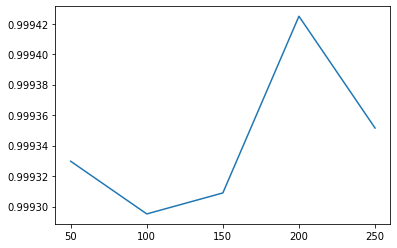

In [ ]:
plt.plot(scores2['Test Score'])
plt.xticks(n_ests);

In [ ]:
sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()

,Test Score,Train Score
200,0.999425,0.999968
250,0.999352,0.999965
50,0.99933,0.999955
150,0.999309,0.999954
100,0.999295,0.999948


In [ ]:
evaluate_model(y_train, rf_train_preds,split='training')
evaluate_model(y_test,rf_test_preds,split='test')


Results for training data:
  - R^2 = 1.0
  - RMSE = 12.052

Results for test data:
  - R^2 = 0.999
  - RMSE = 40.978



# Result

In [ ]:
print("Decision Tree Model Score:")
evaluate_model(y_train,train_dec_pred ,split='training')
evaluate_model(y_test,test_dec_pred ,split='test')

Decision Tree Model Score:
Results for training data:
  - R^2 = 1.0
  - RMSE = 0.0

Results for test data:
  - R^2 = 1.0
  - RMSE = 15.551



In [ ]:
print("Random Forest Model Score:")

evaluate_model(y_train, rf_train_preds,split='training')
evaluate_model(y_test,rf_test_preds,split='test')


Random Forest Model Score:
Results for training data:
  - R^2 = 1.0
  - RMSE = 12.052

Results for test data:
  - R^2 = 0.999
  - RMSE = 40.978

